In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# Listing files in the Kaggle input directory
input_dir = r'C:\Users\gnana\OneDrive\Desktop\DV lab1'
for dirname, _, filenames in os.walk(input_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\gnana\OneDrive\Desktop\DV lab1\gender_submission.csv
C:\Users\gnana\OneDrive\Desktop\DV lab1\test.csv
C:\Users\gnana\OneDrive\Desktop\DV lab1\titanic-survival-eda-classification-imputation (1).ipynb
C:\Users\gnana\OneDrive\Desktop\DV lab1\train.csv


In [23]:
import os

# Define the path to your directory
input_dir = r'C:\Users\gnana\OneDrive\Desktop\DV lab1'

# Print the path to confirm it's correct
print(f"Looking in directory: {input_dir}")

# Check if the directory exists
if not os.path.exists(input_dir):
    print("Directory does not exist!")
else:
    print("Directory exists!")


Looking in directory: C:\Users\gnana\OneDrive\Desktop\DV lab1
Directory exists!


In [24]:
if os.path.exists(input_dir):
    files = os.listdir(input_dir)
    if not files:
        print("The directory is empty.")
    else:
        print("Files in the directory:")
        for file in files:
            print(file)


Files in the directory:
gender_submission.csv
test.csv
titanic-survival-eda-classification-imputation (1).ipynb
train.csv


 ***1. Training the data***

In [50]:
data=pd.read_csv(r'C:\Users\gnana\OneDrive\Desktop\DV lab1\train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [46]:
#sns.heatmap(data = data,annot=True)

 ***2. Replace the values in 'Embarked' column and make separate values for each of the following values it contains in that column. 
Note :  We are converting strings into int to prevent further errors that would occur in the followig steps***

In [51]:
data.Embarked.unique()
data['Embarked_s']=data['Embarked'].replace('Q',0).replace('C',0).replace('S',1)
data['Embarked_c']=data['Embarked'].replace('S',0).replace('Q',0).replace('C',1)
data['Embarked_q']=data['Embarked'].replace('C',0).replace('S',0).replace('Q',1)



***Note: Conversion of str into int to avoid errors. ***

In [52]:
#data.Sex= data.Sex.map( {'M': 1, 'F': 0, 'O': 3} )
data['Sex'].replace( 'female', 0, inplace=True )
data['Sex'].replace( 'male', 1, inplace=True )
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_s,Embarked_c,Embarked_q
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,1.0,0.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,1.0,0.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,1.0,0.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,0.0,1.0,0.0


***If you want to remove 0 value in 'Embarked' column then simply run the code given below and get the required data .***


In [29]:
#data=data[data.Embarked!=0]
#data=data[data[('Embarked')].map(data['Embarked'].value_counts())>0]*
#data

In [30]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Embarked_s       2
Embarked_c       2
Embarked_q       2
dtype: int64

***Inorder to fill the null values , simply type the follwing code given below.
Note:There is an alterative method to remove null values i.e 'IMPUTER . Check out 'trans'(will be done in the folllwing steps) where we simply impute the null values based on parameters applied to a specific imputer.*** 

<Axes: ylabel='count'>

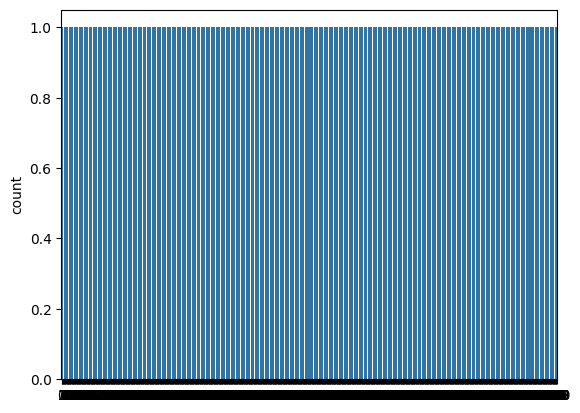

In [32]:
import seaborn as sns
sns.countplot(data.Survived)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Embarked_s   889 non-null    float64
 13  Embarked_c   889 non-null    float64
 14  Embarked_q   889 non-null    float64
dtypes: float64(5), int64(6), object(4)
memory usage: 104.5+ KB


In [54]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_s,Embarked_c,Embarked_q
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000,889.000000,889.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.724409,0.188976,0.086614
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.447063,0.391710,0.281427
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


<Axes: >

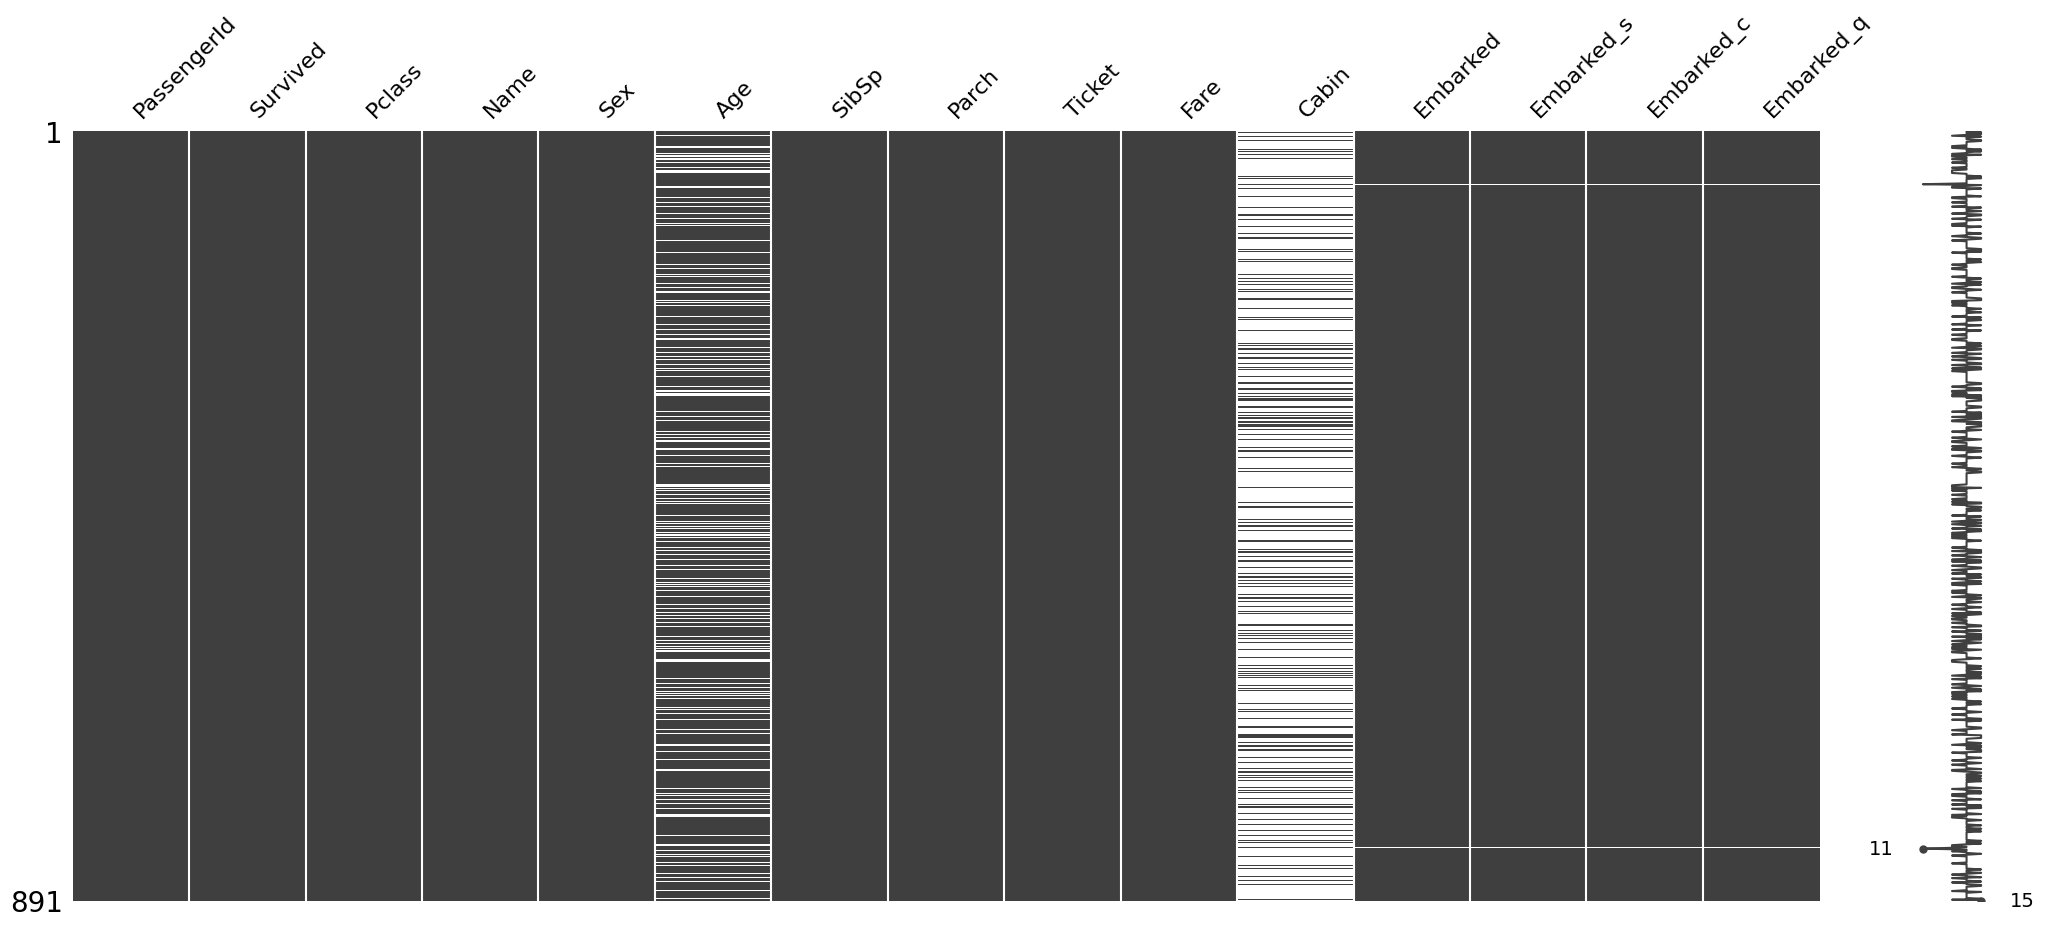

In [56]:
import missingno
missingno.matrix(data)

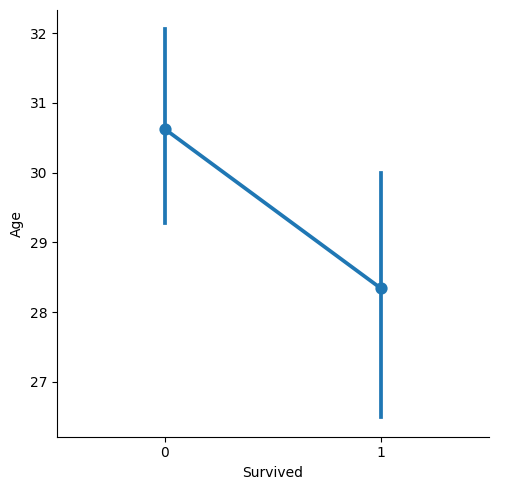

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use catplot instead of factorplot
sns.catplot(x='Survived', y='Age', data=data, height=5, kind='point')

# Show the plot
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

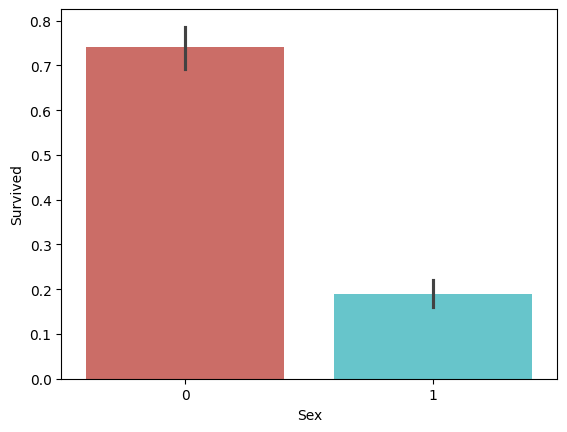

In [61]:
import seaborn as sns
sns.barplot(x="Sex", y="Survived", data=data, palette="hls")

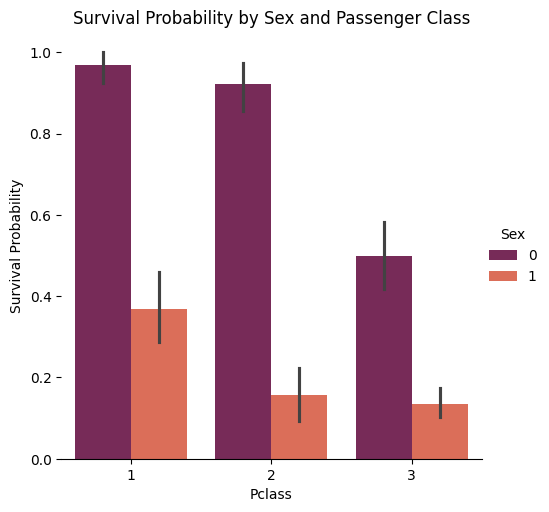

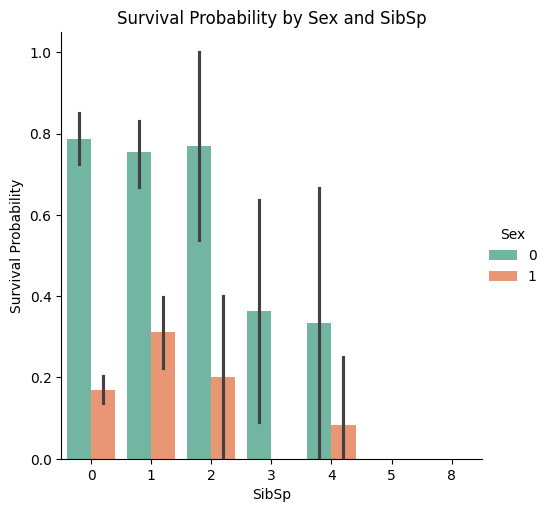

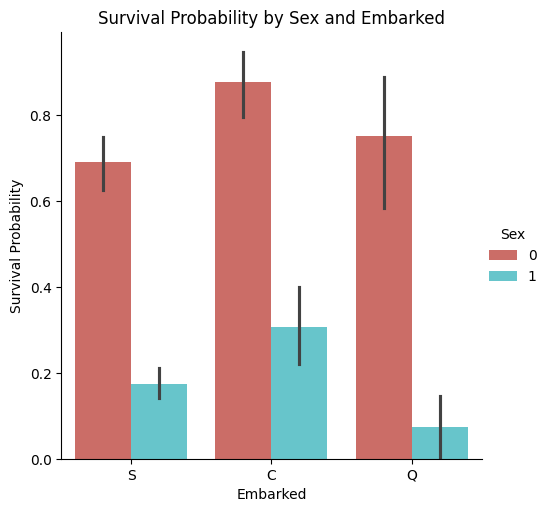

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# First plot: Survival Probability by Pclass
se = sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='bar', palette='rocket', height=5)
se.despine(left=True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

# Second plot: Survival Probability by SibSp
sw = sns.catplot(x='SibSp', y='Survived', hue='Sex', data=data, kind='bar', palette='Set2', height=5)
sw.despine(left=False)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and SibSp')

# Third plot: Survival Probability by Embarked
ss = sns.catplot(x='Embarked', y='Survived', hue='Sex', data=data, kind='bar', palette='hls', height=5)
ss.despine(left=False)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Embarked')

# Show the plots
plt.show()

<Axes: xlabel='SibSp', ylabel='count'>

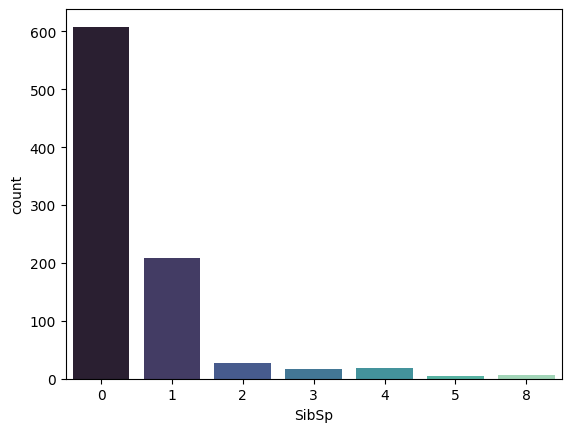

In [64]:
sns.countplot(x='SibSp',data=data,palette="mako")

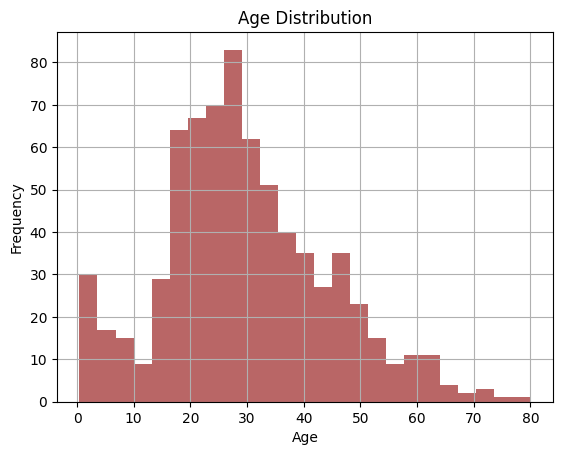

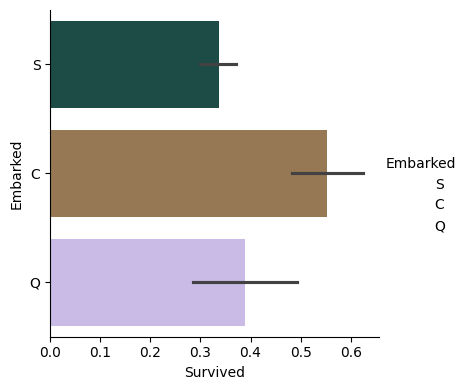

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for the 'Age' column
data['Age'].hist(bins=25, color='darkred', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# Create a bar plot for 'Survived' by 'Embarked'
sns.catplot(x="Survived", y="Embarked", data=data, kind="bar", height=4, palette="cubehelix")

# Show the plot
plt.show()

<Axes: xlabel='Age'>

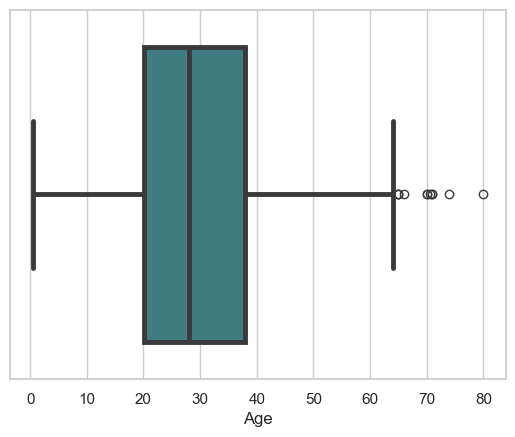

In [67]:
sns.set(style='whitegrid')
sns.boxplot(x=data['Age'],linewidth=3.5,palette="crest")

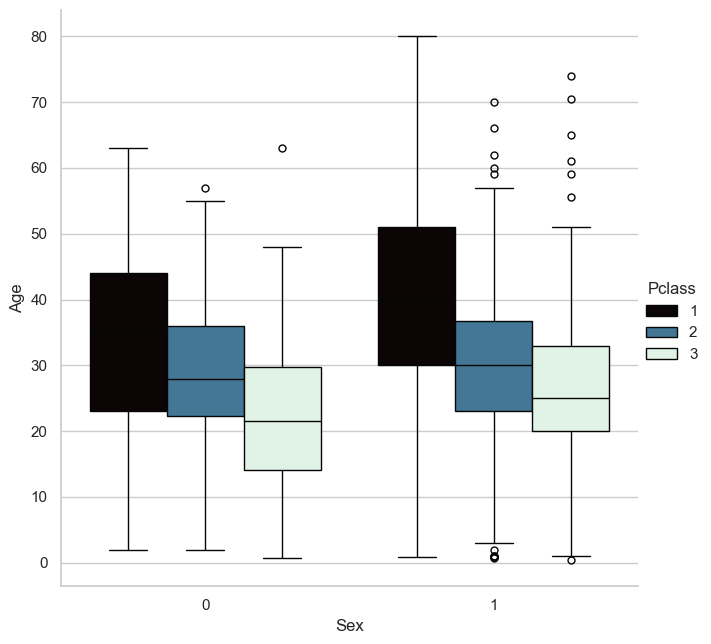

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for 'Age' by 'Sex' with hue for 'Pclass'
sns.catplot(x="Sex", y="Age", hue="Pclass", data=data, kind="box", palette="mako", height=6.6)

# Show the plot
plt.show()

Text(0.5, 0, 'Fare')

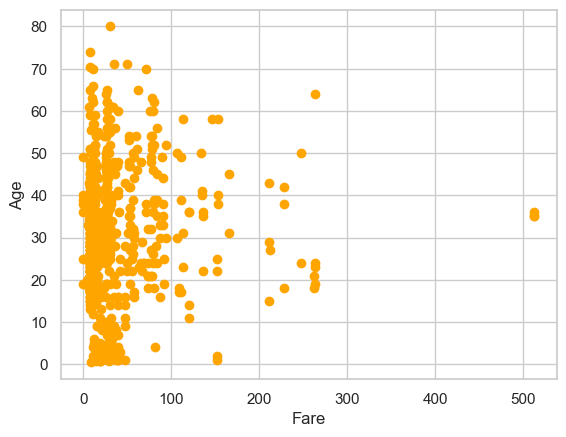

In [70]:
y = data.Age.values.reshape(-1,1)
x = data.Fare.values.reshape(-1,1)

plt.scatter(x,y,color='orange')
plt.ylabel("Age")
plt.xlabel("Fare")

In [72]:
pd.crosstab([data.Embarked],[data.Age,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

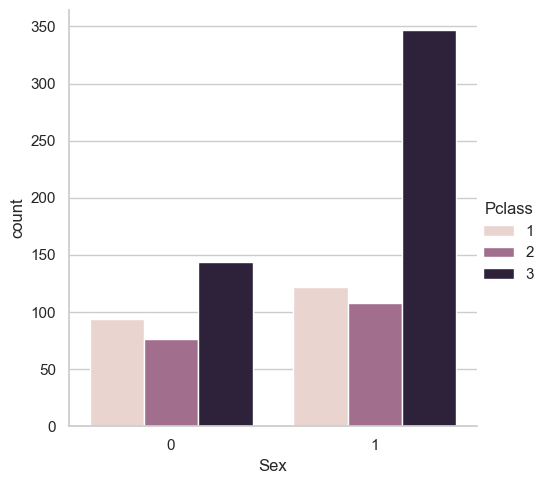

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for 'Sex' with hue for 'Pclass'
sns.catplot(x='Sex', hue='Pclass', data=data, kind='count', height=5)

# Show the plot
plt.show()

In [76]:
#data.Sex=data.Sex.fillna(0)
#data.Age=data.Age.fillna(0)
#data.Cabin=data.Cabin.fillna(0)
#data.Embarked_s=data.Embarked_s.fillna(0)
#data.Embarked_c=data.Embarked_c.fillna(0)
#data.Embarked_q=data.Embarked_q.fillna(0)


In [77]:
data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

***Since we have not removed the null values we impute the null values*** 

In [78]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Embarked_s       2
Embarked_c       2
Embarked_q       2
dtype: int64

In [79]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Embarked_s     float64
Embarked_c     float64
Embarked_q     float64
dtype: object

***3. We first drop out the "survived" column from the data inorder to find its prediction by using varous algorithms. And then remove the unecessary columns that isnt really necesaary in further steps .***

In [82]:
x = data.drop(columns = ['Survived','Ticket','Cabin','PassengerId','Name','Embarked'])

In [83]:
y = data[['Survived']]

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [88]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_s,Embarked_c,Embarked_q
0,3,1,22.0,1,0,7.2500,1.0,0.0,0.0
1,1,0,38.0,1,0,71.2833,0.0,1.0,0.0
2,3,0,26.0,0,0,7.9250,1.0,0.0,0.0
3,1,0,35.0,1,0,53.1000,1.0,0.0,0.0
4,3,1,35.0,0,0,8.0500,1.0,0.0,0.0


In [89]:
x.dtypes

Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_s    float64
Embarked_c    float64
Embarked_q    float64
dtype: object

In [90]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_s,Embarked_c,Embarked_q
0,3,1,22.0,1,0,7.2500,1.0,0.0,0.0
1,1,0,38.0,1,0,71.2833,0.0,1.0,0.0
2,3,0,26.0,0,0,7.9250,1.0,0.0,0.0
3,1,0,35.0,1,0,53.1000,1.0,0.0,0.0
4,3,1,35.0,0,0,8.0500,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,1.0,0.0,0.0
887,1,0,19.0,0,0,30.0000,1.0,0.0,0.0
888,3,0,NaN,1,2,23.4500,1.0,0.0,0.0
889,1,1,26.0,0,0,30.0000,0.0,1.0,0.0


In [91]:
x.Embarked_q.unique()

array([ 0.,  1., nan])

In [92]:
nom_cols =[]
ord_cols = []
num_cols=[0,4,5]
null_cols=[1,2,6,7,8]
#Kbin_cols=[0,1,4],
binarizer_cols=[3]

In [95]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, Binarizer, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.compose import make_column_transformer
from sklearn import set_config

# Assuming nom_cols, null_cols, ord_cols, num_cols, and binarizer_cols are defined lists of column names

trans = make_column_transformer(
    (OneHotEncoder(sparse_output=False), nom_cols),  # Use sparse_output instead of sparse
    (KNNImputer(n_neighbors=45), null_cols),
    (OrdinalEncoder(), ord_cols),
    (StandardScaler(), num_cols),
    (Binarizer(threshold=55), binarizer_cols),
    remainder='passthrough'
)

# Display configuration for the transformer
set_config(display='diagram')
trans


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False), []),
                                ('knnimputer', KNNImputer(n_neighbors=45),
                                 [1, 2, 6, 7, 8]),
                                ('ordinalencoder', OrdinalEncoder(), []),
                                ('standardscaler', StandardScaler(), [0, 4, 5]),
                                ('binarizer', Binarizer(threshold=55), [3])])

In [96]:
from sklearn.tree import DecisionTreeClassifier 
algorithm_x=DecisionTreeClassifier(criterion='entropy')

In [97]:
from sklearn.neighbors import KNeighborsClassifier
algorithm = KNeighborsClassifier(15) #
algorithm

KNeighborsClassifier(n_neighbors=15)

In [98]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(trans,algorithm)
pipe_x=make_pipeline(trans,algorithm_x)
pipe


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  []),
                                                 ('knnimputer',
                                                  KNNImputer(n_neighbors=45),
                                                  [1, 2, 6, 7, 8]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), []),
                                                 ('standardscaler',
                                                  StandardScaler(), [0, 4, 5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [3])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=15))])

In [99]:
pipe_x

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  []),
                                                 ('knnimputer',
                                                  KNNImputer(n_neighbors=45),
                                                  [1, 2, 6, 7, 8]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), []),
                                                 ('standardscaler',
                                                  StandardScaler(), [0, 4, 5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [3])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy'))])

In [100]:
pipe.fit(x_train,y_train)

c:\Users\gnana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  []),
                                                 ('knnimputer',
                                                  KNNImputer(n_neighbors=45),
                                                  [1, 2, 6, 7, 8]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), []),
                                                 ('standardscaler',
                                                  StandardScaler(), [0, 4, 5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [3])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=15))])

In [101]:
pipe_x.fit(x_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  []),
                                                 ('knnimputer',
                                                  KNNImputer(n_neighbors=45),
                                                  [1, 2, 6, 7, 8]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), []),
                                                 ('standardscaler',
                                                  StandardScaler(), [0, 4, 5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [3])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy'))])

In [102]:
pred_x=pipe_x.predict(x_test)
pred_x

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0])

Accuracy: 76.68%


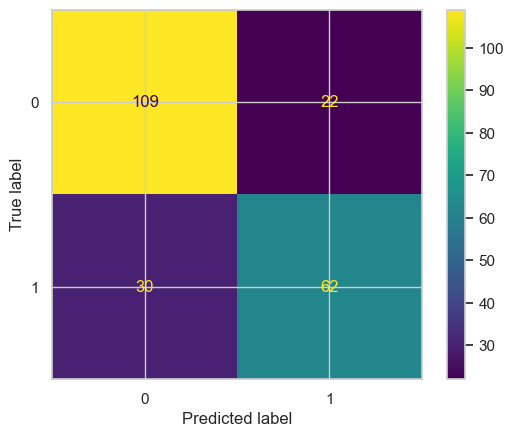

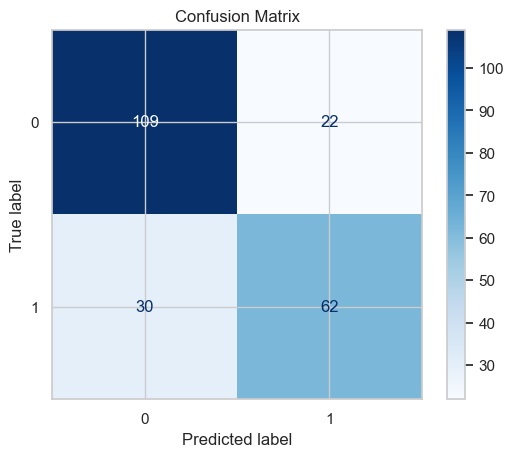

In [106]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate accuracy
accuracy = accuracy_score(y_test, pred_x) * 100
print(f'Accuracy: {accuracy:.2f}%')

# Create a confusion matrix display
disp = ConfusionMatrixDisplay.from_predictions(y_test, pred_x)

# Show the confusion matrix plot
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [107]:
pred=pipe.predict(x_test)
pred

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0])

In [111]:
from sklearn.metrics import accuracy_score

# Assuming pred contains your predictions and y_test contains the true labels
accuracy = accuracy_score(y_test, pred) * 100  # Calculate accuracy as a percentage

# Print the accuracy percentage
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 70.40%


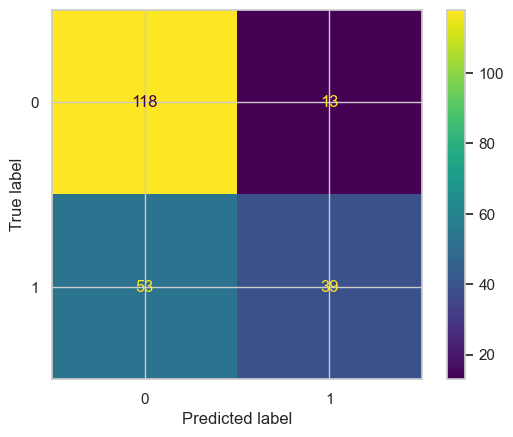

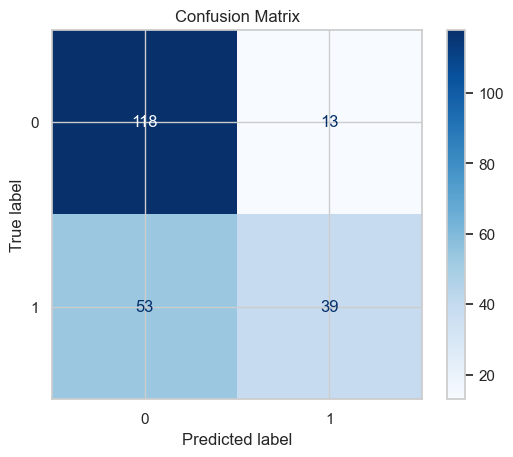

In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Assuming you have a fitted pipeline (pipe) and your test data (x_test, y_test)
# Use the pipeline to make predictions
predictions = pipe.predict(x_test)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions)

# Show the confusion matrix plot
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [115]:
from imblearn.over_sampling import RandomOverSampler
over= RandomOverSampler()
o_x , o_y = over.fit_resample(x,y)
o_y.value_counts()

Survived
0           549
1           549
Name: count, dtype: int64

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
pipe_gbc=make_pipeline(trans,gbc)
pipe_gbc

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  []),
                                                 ('knnimputer',
                                                  KNNImputer(n_neighbors=45),
                                                  [1, 2, 6, 7, 8]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), []),
                                                 ('standardscaler',
                                                  StandardScaler(), [0, 4, 5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [3])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [117]:
pipe_gbc.fit(x_train,y_train)

c:\Users\gnana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  []),
                                                 ('knnimputer',
                                                  KNNImputer(n_neighbors=45),
                                                  [1, 2, 6, 7, 8]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), []),
                                                 ('standardscaler',
                                                  StandardScaler(), [0, 4, 5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [3])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [118]:
pred_gbc=pipe_gbc.predict(x_test)
pred_gbc

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0])

In [119]:
accuracy_score(pred_gbc,y_test)*100

79.37219730941703

In [120]:
from imblearn.over_sampling import SMOTE
over= RandomOverSampler()
_x , o_y = over.fit_resample(x,y)
o_y.value_counts()

Survived
0           549
1           549
Name: count, dtype: int64

In [121]:
from imblearn.pipeline import make_pipeline
s = SMOTE()
n_pipe = make_pipeline(trans,s,gbc)
n_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  []),
                                                 ('knnimputer',
                                                  KNNImputer(n_neighbors=45),
                                                  [1, 2, 6, 7, 8]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), []),
                                                 ('standardscaler',
                                                  StandardScaler(), [0, 4, 5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [3])])),
                ('smote', SMOTE()),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [122]:
accuracy_score(pred,y_test)*100


70.4035874439462

In [123]:
from sklearn.linear_model import LogisticRegression as lr
algorithm_2 = lr(solver='liblinear')
pipe_2 = make_pipeline(trans,algorithm_2)
pipe_2

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  []),
                                                 ('knnimputer',
                                                  KNNImputer(n_neighbors=45),
                                                  [1, 2, 6, 7, 8]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), []),
                                                 ('standardscaler',
                                                  StandardScaler(), [0, 4, 5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [3])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [124]:
pipe_2.fit(x_train,y_train)


c:\Users\gnana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  []),
                                                 ('knnimputer',
                                                  KNNImputer(n_neighbors=45),
                                                  [1, 2, 6, 7, 8]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(), []),
                                                 ('standardscaler',
                                                  StandardScaler(), [0, 4, 5]),
                                                 ('binarizer',
                                                  Binarizer(threshold=55),
                                                  [3])])),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

In [125]:
pred_2 = pipe_2.predict(x_test)
pred_2

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0])

In [126]:
accuracy_score(pred_2,y_test)*100

75.7847533632287

In [127]:
from sklearn.model_selection import KFold, cross_val_score,StratifiedKFold
kf=StratifiedKFold(n_splits=4)
np.mean(cross_val_score(pipe,x,y,cv=kf,scoring='accuracy')*100) 

c:\Users\gnana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\gnana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\gnana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\gnana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: 

np.float64(73.62996404476226)

In [128]:
from sklearn.svm import SVC
model1=SVC(kernel='linear')
pipe_1 = make_pipeline(trans,algorithm)
pipe_1
pipe_1.fit(x_train,y_train)
pred_1=pipe.predict(x_test)
accuracy_score(pred_1,y_test)*100

c:\Users\gnana\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


70.4035874439462

In [139]:
y_test.shape

(223, 1)

In [144]:
data1=pd.read_csv(r'C:\Users\gnana\OneDrive\Desktop\DV lab1\test.csv')
data1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<Axes: >

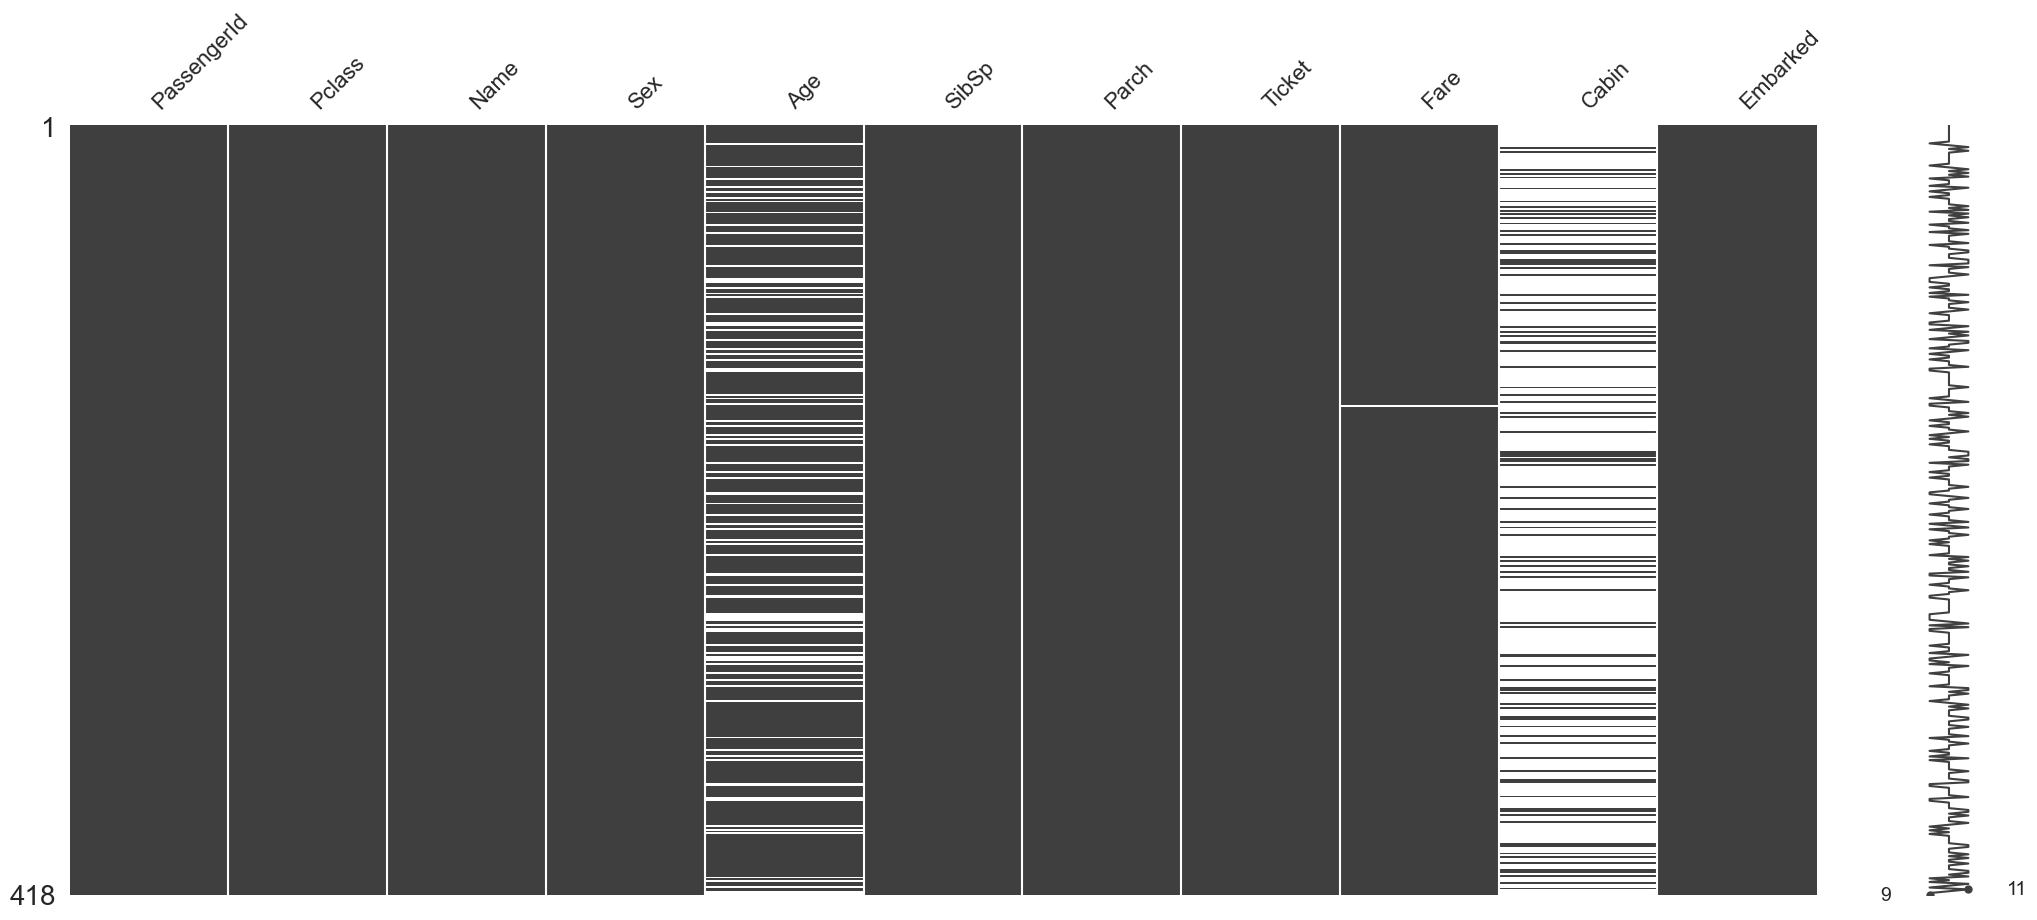

In [145]:
missingno.matrix(data1)

In [146]:
data1['Sex'].replace( 'female', 0, inplace=True )
data1['Sex'].replace( 'male', 1, inplace=True )

In [147]:
data1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [148]:
data1.Age=data1.Age.fillna(0)
data1.Cabin=data1.Cabin.fillna(0)
data1.Fare=data1.Fare.fillna(0)


In [149]:
data1.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [150]:
#data1=data1[data1.Embarked!=0]
#data1=data1[data1[('Embarked')].map(data1['Embarked'].value_counts())>0]
#data1

In [151]:
#data1.loc[data1['Sex']=='male']=1
#data1.loc[data1['Sex']=='female']=0

In [152]:
data1['Embarked_s']=data1['Embarked'].replace('Q',0).replace('C',0).replace('S',1)
data1['Embarked_c']=data1['Embarked'].replace('S',0).replace('Q',0).replace('C',1)
data1['Embarked_q']=data1['Embarked'].replace('C',0).replace('S',0).replace('Q',1)

In [153]:
data1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_s,Embarked_c,Embarked_q
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,Q,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,S,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,Q,0,0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,S,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,S,1,0,0


In [154]:
x1 = data1.drop(columns = ['Ticket','Cabin','PassengerId','Name','Embarked'])
x1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_s,Embarked_c,Embarked_q
0,3,1,34.5,0,0,7.8292,0,0,1
1,3,0,47.0,1,0,7.0000,1,0,0
2,2,1,62.0,0,0,9.6875,0,0,1
3,3,1,27.0,0,0,8.6625,1,0,0
4,3,0,22.0,1,1,12.2875,1,0,0
...,...,...,...,...,...,...,...,...,...
413,3,1,0.0,0,0,8.0500,1,0,0
414,1,0,39.0,0,0,108.9000,0,1,0
415,3,1,38.5,0,0,7.2500,1,0,0
416,3,1,0.0,0,0,8.0500,1,0,0


In [155]:
x1.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_s    0
Embarked_c    0
Embarked_q    0
dtype: int64

In [159]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, KBinsDiscretizer, Binarizer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import make_column_transformer
from sklearn import set_config
from sklearn.preprocessing import StandardScaler

# Create the column transformer
trans = make_column_transformer(
    (OneHotEncoder(sparse_output=False), nom_cols),
    (KNNImputer(n_neighbors=45), null_cols),
    (OrdinalEncoder(), ord_cols),
    (StandardScaler(), num_cols),
    (Binarizer(threshold=55), binarizer_cols),
    remainder='passthrough'
)

set_config(display='diagram')
trans


ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(sparse_output=False), []),
                                ('knnimputer', KNNImputer(n_neighbors=45),
                                 [1, 2, 6, 7, 8]),
                                ('ordinalencoder', OrdinalEncoder(), []),
                                ('standardscaler', StandardScaler(), [0, 4, 5]),
                                ('binarizer', Binarizer(threshold=55), [3])])

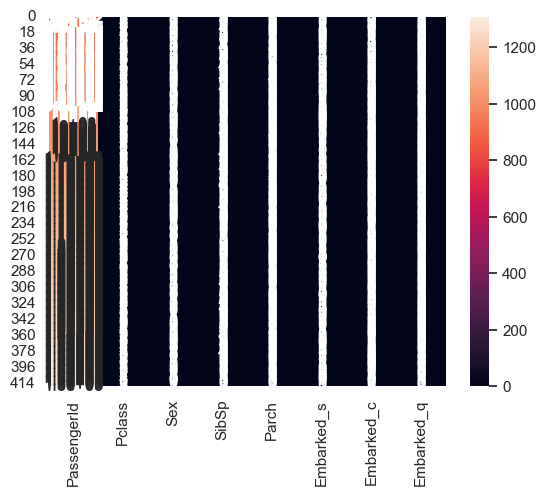

In [161]:
import seaborn as sns 
import matplotlib.pyplot as plt
#data1=np.random.randint(low = 1,high = 100,size = (10, 10))
sns.heatmap(data=data1.select_dtypes('int','float'),annot=True)
plt.show()

In [162]:
pred123=pipe_gbc.predict(x1)
pred123

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [163]:
#survival_prediction=algorithm.predict(x1)
#survival_prediction

In [165]:
submit=pd.read_csv(r'C:\Users\gnana\OneDrive\Desktop\DV lab1\gender_submission.csv')

In [166]:
submit['Survived']=pred123
submit.to_csv('submission.csv', index=False)

In [167]:
submit.Survived.value_counts()

Survived
0    216
1    202
Name: count, dtype: int64